In [12]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the datasets
crime_spatital_data = gpd.read_file('/Users/elliotbu/Desktop/Vancouver Crime Analysis/04_Vancouver Crime-Weather/VancouverCrimeData_with_datetime.csv')
weather_data =  pd.read_csv('/Users/elliotbu/Desktop/Vancouver Crime Analysis/04_Vancouver Crime-Weather/VancouverWeatherData.csv')

print(crime_spatital_data.head())
print('-----------------------------------------------------')
print(weather_data.head())


          datetime  YEAR MONTH DAY HOUR MINUTE                      TYPE  \
0  01/10/2012 0:00  2012    10   1    0      0          Theft of Bicycle   
1  01/10/2012 0:00  2012    10   1    0      0        Theft from Vehicle   
2  01/10/2012 0:00  2012    10   1    0      0                  Mischief   
3  01/10/2012 0:00  2012    10   1    0      0        Theft from Vehicle   
4  01/10/2012 0:00  2012    10   1              Offence Against a Person   

               HUNDRED_BLOCK              NEIGHBOURHOOD     Latitude  \
0           2XX ALEXANDER ST                 Strathcona  49.28411378   
1             1XX E 14TH AVE             Mount Pleasant  49.25837024   
2            7XX W PENDER ST  Central Business District  49.28465369   
3         14XX W HASTINGS ST  Central Business District  49.29032179   
4  OFFSET TO PROTECT PRIVACY                                           

      Longitude  
0  -123.0980686  
1  -123.1021404  
2  -123.1149398  
3  -123.1280468  
4                
--

In [13]:
# stats for each datasets
crime_stats = crime_spatital_data.describe()
weather_stats = weather_data.describe()

print(crime_stats)
print('-----------------------------------------------------')
print(weather_stats)

               datetime    YEAR   MONTH     DAY    HOUR  MINUTE  \
count            141180  141180  141180  141180  141180  141180   
unique            92418       5      12      31      25      61   
top     01/01/2013 0:00    2016      10       1               0   
freq                 45   37798   14323    5194   14119   50824   

                      TYPE              HUNDRED_BLOCK  \
count               141180                     141180   
unique                  11                      14899   
top     Theft from Vehicle  OFFSET TO PROTECT PRIVACY   
freq                 43909                      14119   

                    NEIGHBOURHOOD Latitude Longitude  
count                      141180   141180    141180  
unique                         25    44545     43972  
top     Central Business District                     
freq                        32330    14119     14119  
-----------------------------------------------------
               YEAR         MONTH           DAY  

In [14]:
# Convert 'Date' columns to datetime to merge later (form a common variable)
crime_spatital_data['datetime'] = pd.to_datetime(crime_spatital_data['datetime'], format='%d/%m/%Y %H:%M')
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%d/%m/%Y %H:%M')

# Merging datasets on Date
merged_data = pd.merge(crime_spatital_data, weather_data, on='datetime', how='inner')

# Save to local folder
merged_data.to_csv('/Users/elliotbu/Desktop/Vancouver Crime Analysis/04_Vancouver Crime-Weather/merged_data.csv', index=False)

# Display merged data
merged_data.head()

,datetime,YEAR_x,MONTH_x,DAY_x,HOUR_x,MINUTE_x,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,Latitude,...,YEAR_y,MONTH_y,DAY_y,HOUR_y,MINUTE_y,Temp_C,Weather_Description,Wind_Speed,Humidity,Air_Pressure
0,2012-10-01 12:00:00,2012,10,1,12,0,Theft from Vehicle,31XX GRAVELEY ST,Hastings-Sunrise,49.27043234,...,2012,10,1,12,0,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 12:00:00,2012,10,1,12,0,Mischief,24XX BRUNSWICK ST,Mount Pleasant,49.26339943,...,2012,10,1,12,0,NaN,NaN,NaN,NaN,NaN
2,2012-10-01 14:00:00,2012,10,1,14,0,Theft from Vehicle,E 50TH AVE / FRASER ST,Sunset,49.22451766,...,2012,10,1,14,0,11.48,broken clouds,0.0,76.0,NaN
3,2012-10-01 15:00:00,2012,10,1,15,0,Theft from Vehicle,17XX KINGSWAY AVE,Kensington-Cedar Cottage,49.24671799,...,2012,10,1,15,0,11.48,broken clouds,0.0,76.0,NaN
4,2012-10-01 16:00:00,2012,10,1,16,0,Theft of Bicycle,15XX GRANT ST,Grandview-Woodland,49.27140322,...,2012,10,1,16,0,11.47,broken clouds,0.0,77.0,NaN


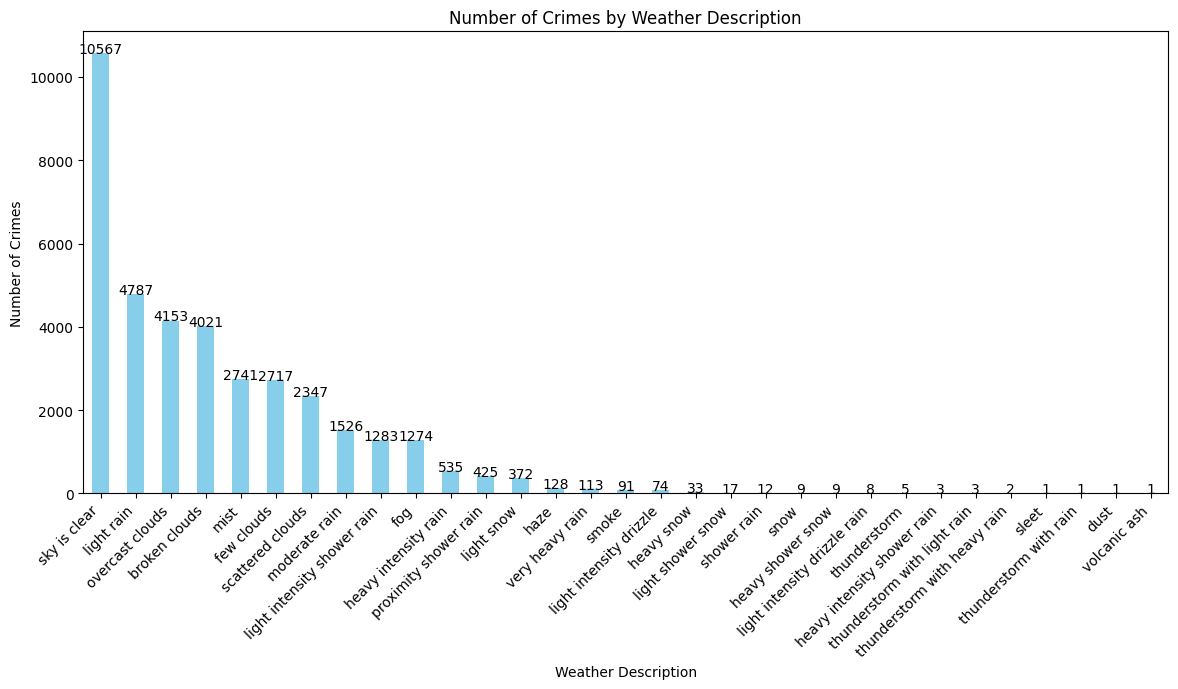

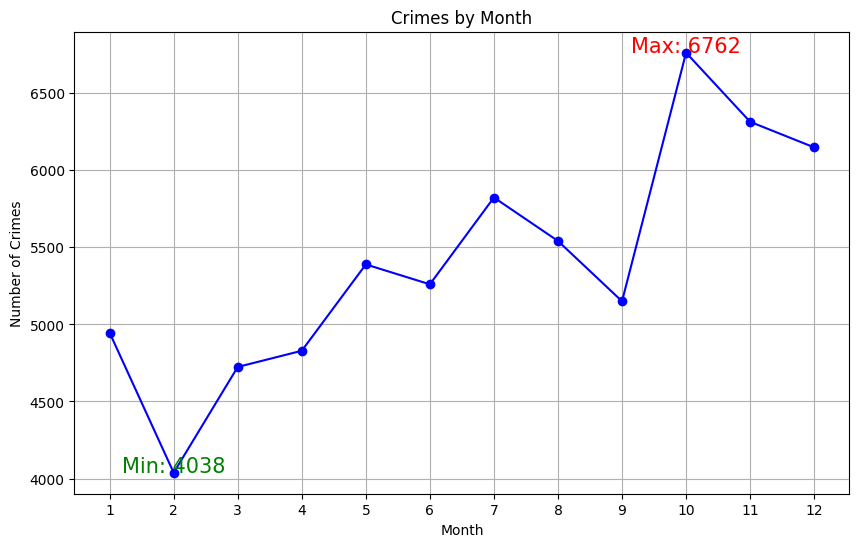

In [15]:
# First Figure
# Grouping by 'Weather_Description' and counting the number of crimes
crime_weather_grouped = weather_data.groupby('Weather_Description').size()

# Sorting the values for better visualization
crime_weather_grouped = crime_weather_grouped.sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(14,6))
crime_weather_grouped.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes by Weather Description')
plt.xlabel('Weather Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')

# Show corresponding values for each bar
for i in range(len(crime_weather_grouped)):
    plt.text(i, crime_weather_grouped.iloc[i], str(crime_weather_grouped.iloc[i]), ha='center', fontsize=10)
plt.show()

# Second Figure
# Grouping the data by month and counting the number of crimes
crimes_by_month = merged_data.groupby(merged_data['datetime'].dt.month).size()

# Plotting the number of crimes by month using a line chart
plt.figure(figsize=(10,6))
crimes_by_month.plot(kind='line', marker='o', color='blue')
plt.title('Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(1, 13), labels=['1', '2', '3', '4', '5', '6', 
                                       '7', '8', '9', '10', '11', '12'])
plt.grid(True)

# Label the max value
max_value = crimes_by_month.max()
max_index = crimes_by_month.idxmax()
plt.text(max_index, max_value, 'Max: ' + str(max_value), ha='center', fontsize=15, color='red')

# Label the min value
min_value = crimes_by_month.min()
min_index = crimes_by_month.idxmin()
plt.text(min_index, min_value, 'Min: ' + str(min_value), ha='center', fontsize=15, color='green')

plt.show()


In [16]:
# 2 Tables

# How many types of crimes are there in this dataset
crime_type_count = crime_spatital_data['TYPE'].value_counts()
print(crime_type_count)
print('---------------------------------------------------------')


# Find out number of crimes by hours
merged_data['Hour'] = merged_data['datetime'].dt.hour
crimes_by_hour = merged_data.groupby('Hour').size()
crimes_by_hour_df = crimes_by_hour.reset_index(name='Number of Crimes')
print(crimes_by_hour_df)

TYPE
Theft from Vehicle                                        43909
Other Theft                                               18969
Mischief                                                  18551
Offence Against a Person                                  14075
Break and Enter Residential/Other                         13171
Theft of Bicycle                                          10516
Break and Enter Commercial                                 9644
Vehicle Collision or Pedestrian Struck (with Injury)       6796
Theft of Vehicle                                           5443
Vehicle Collision or Pedestrian Struck (with Fatality)       62
Homicide                                                     44
Name: count, dtype: int64
---------------------------------------------------------
    Hour  Number of Crimes
0      0             19334
1      1              1152
2      2               769
3      3               555
4      4               441
5      5               388
6      6          

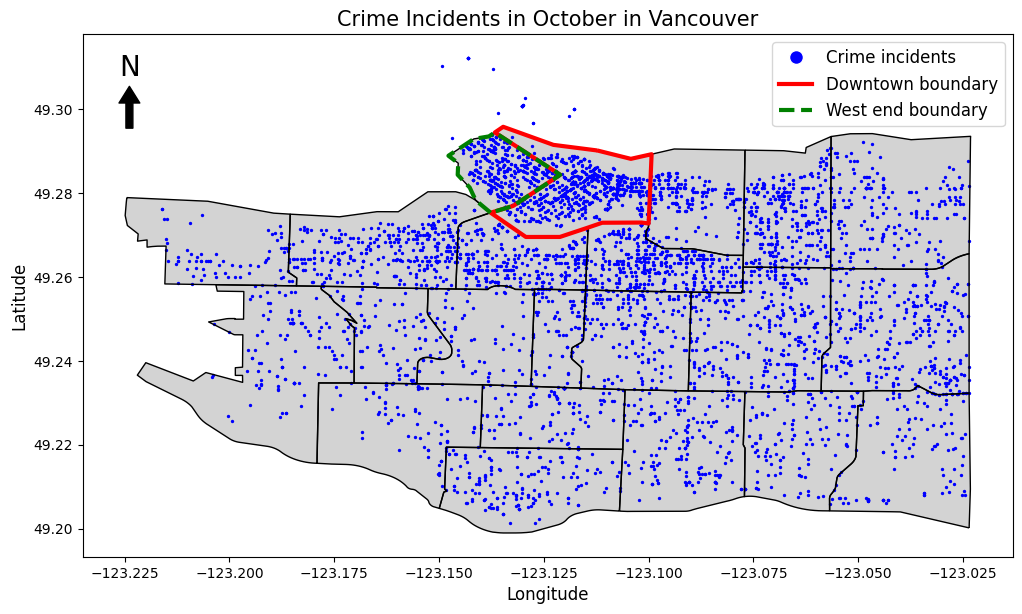

In [17]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Base map
local_area = gpd.read_file('/Users/elliotbu/Desktop/Lab-01/04_Vancouver Crime-Weather/local-area-boundary/local-area-boundary.shp')

# Convert to numeric so that it can be plotted
merged_data['Longitude'] = pd.to_numeric(merged_data['Longitude'])
merged_data['Latitude'] = pd.to_numeric(merged_data['Latitude'])
merged_data['MONTH_x'] = pd.to_numeric(merged_data['MONTH_x'])

# Filter the maximum of crime (i.e., OCTOBER)
merged_data_oct = merged_data[merged_data['MONTH_x'] == 10]

# Form points to be plotted
geometry = [Point(xy) for xy in zip(merged_data_oct['Longitude'], merged_data_oct['Latitude'])]
geo_merged_data = gpd.GeoDataFrame(merged_data_oct, geometry=geometry)

# filter to the Downtown and West end areas 
downtown_area = local_area[local_area['name'] == 'Downtown']
west_end_area = local_area[local_area['name'] == 'West End']

# Create the frame 
figure, axes = plt.subplots(figsize=(12, 10))  # Create figure and axes
local_area.boundary.plot(ax=axes, linewidth=1, color='black')
local_area.plot(ax=axes, color='lightgray')

# Show the Downtown and West end boundaries
downtown_area.boundary.plot(ax=axes, linewidth=3, color='red', label='Downtown')
west_end_area.boundary.plot(ax=axes, linewidth=3, color='green', linestyle='--', label='West End')

# Points addition
geo_merged_data.plot(ax=axes, marker='o', color='blue', markersize=2, label='Crime Incidents')

# Add title and annotations (Improve the map)
axes.set_title('Crime Incidents in October in Vancouver', fontsize=15)

# Add North arrow in the left top corner (Improvement)
axes.annotate('', xy=(0.05, 0.9), xytext=(0.05, 0.82), xycoords='axes fraction',
            arrowprops=dict(facecolor='black', width=5, headwidth=15))
axes.text(0.05, 0.92, 'N', transform=axes.transAxes, ha='center', fontsize=20)

# Add a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Crime incidents', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], color='red', lw=3, label='Downtown boundary'),
           plt.Line2D([0], [0], color='green', linestyle='--', lw=3, label='West end boundary')]
axes.legend(handles=handles, loc='upper right', fontsize=12)

# Add x-axis and y-axis labels
axes.set_xlabel('Longitude', fontsize=12)
axes.set_ylabel('Latitude', fontsize=12)

plt.show()


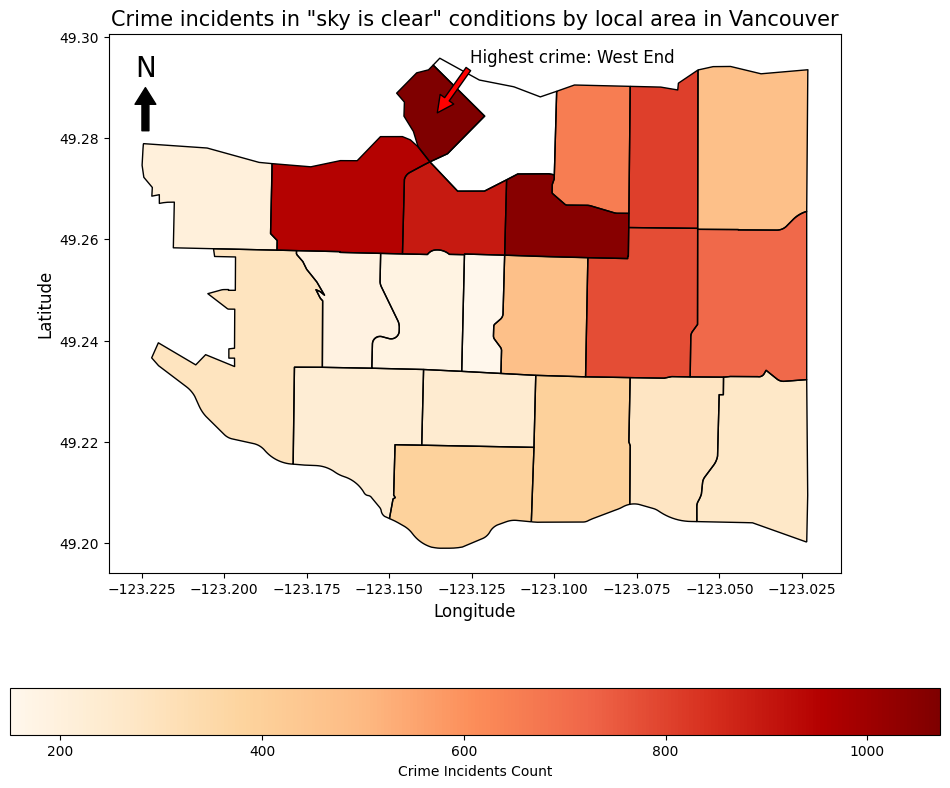

In [18]:
# Map 2
# When "sky is clear", filter the dataset
weather_condition = 'sky is clear'
filtered_data = merged_data[merged_data['Weather_Description'] == weather_condition]

# get the number of crimes for each region
crime_count_by_area = filtered_data.groupby('NEIGHBOURHOOD').size()
local_area['Crime_Count'] = local_area['name'].map(crime_count_by_area)

# get the local area name with the highest crime count
max_crime_area = local_area.loc[local_area['Crime_Count'].idxmax()]

# Plot the choropleth map
figure, axes = plt.subplots(figsize=(12, 10))# --> figure and axes
local_area.boundary.plot(ax=axes, linewidth=1, color='black')
local_area.plot(column='Crime_Count', ax=axes, cmap='OrRd', legend=True, 
                legend_kwds={'label': "Crime Incidents Count", 'orientation': "horizontal"})

# Add title and x & y axis
axes.set_title('Crime incidents in ' + '"' + str(weather_condition) + '"' + ' conditions by local area in Vancouver', fontsize=15)
axes.set_xlabel('Longitude', fontsize=12)
axes.set_ylabel('Latitude', fontsize=12)

# Annotate the highest crime location (improvement)
axes.annotate('Highest crime: ' + str(max_crime_area["name"]),
            xy=(max_crime_area.geometry.centroid.x, max_crime_area.geometry.centroid.y),
            xytext=(max_crime_area.geometry.centroid.x + 0.01, max_crime_area.geometry.centroid.y + 0.01),
            arrowprops=dict(facecolor='red'),
            fontsize=12, color='black')

# Add North Arrow in the left top corner (Improvement)
axes.annotate('', xy=(0.05, 0.9), xytext=(0.05, 0.82), xycoords='axes fraction',
            arrowprops=dict(facecolor='black', width=5, headwidth=15))
axes.text(0.05, 0.92, 'N', transform=axes.transAxes, ha='center', fontsize=20)


plt.show()
